In [28]:
# MLP with automatic validation set
import pandas
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
import math 
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
import numpy

In [29]:
dataframe = pandas.read_excel('Test1 (1).xlsx') 
dataframe.tail()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Fitness
10008,7,4,5,6,11,8,9,10,15,12,13,14,3,0,1,2,8.0000
10009,0,10,7,13,9,3,14,4,12,5,11,2,6,15,1,8,5.6569
10010,6,10,0,5,3,15,12,9,13,1,11,14,8,4,7,2,5.6569
10011,4,7,2,8,14,13,1,11,9,10,15,5,3,0,12,6,5.6569
10012,15,6,13,4,1,10,3,8,7,14,5,12,9,2,11,0,5.6569


In [30]:
# split into input (X) and output (Y) variables
X = np.array(dataframe.drop(['Fitness'],1)) #.astype(int)
#X = np.array(dataframe.drop(['Friquency','Tx Height','AoA','Path Loss'],1))

# Assigning the target data into (y)

y = np.array(dataframe['Fitness'])
X.shape, y.shape

((10013, 16), (10013,))

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 

X = np.array(dataframe.drop(['Fitness'],1))
y = np.array(dataframe['Fitness'])
scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(np.array(X).reshape(-1,1))
X = X.reshape(y.shape[0],16)
y = scaler.fit_transform(np.array(y).reshape(-1,1))


print(X.shape)
print(y.shape)

#spilit data 
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

X_train.shape, y_train.shape

(10013, 16)
(10013, 1)


((8010, 16), (8010, 1))

In [32]:
## ANN model
import tensorflow as tf
from tensorflow import keras 


model = keras.Sequential([
    
    keras.layers.Dense(96, input_shape = (16,), activation='relu'),
    keras.layers.Dense(96, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='linear'),
])
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='mean_squared_error', optimizer=optimizer)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 96)                1632      
                                                                 
 dense_16 (Dense)            (None, 96)                9312      
                                                                 
 dense_17 (Dense)            (None, 32)                3104      
                                                                 
 dense_18 (Dense)            (None, 32)                1056      
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 15,137
Trainable params: 15,137
Non-trainable params: 0
_________________________________________________________________


In [37]:

from sklearn.metrics import r2_score
 
kf = KFold(n_splits=7, random_state=30, shuffle=True)
scores = []
r_square = []
rmse = []
MAPE = []
mse = []
corr = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train = X[train_index,:]
    y_train = y[train_index]
    X_test = X[test_index,:]
    y_test = y[test_index]

    # fit the model with the training data
    
    history = model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=1, verbose=1)
    
    
    y_pred = model.predict(X_test)
    
    r = r2_score(y_pred,y_test)
    r_square.append(round(r, 6))
    
    from sklearn.metrics import mean_squared_error
    ### Test Data RMSE
    rmse_prediction = math.sqrt(mean_squared_error(y_test,y_pred))
    rmse.append(round(rmse_prediction, 6))
    
    from sklearn.metrics import mean_absolute_percentage_error
    from sklearn.utils.validation import check_consistent_length, check_array
    MAPE_value = mean_absolute_percentage_error(y_pred,y_test)
    MAPE.append(round(MAPE_value,6))
    
    mse_value = mean_squared_error(y_test,y_pred)
    mse.append(round(mse_value,6))
    
    '''Running the example calculates and prints the Pearson’s correlation coefficient.
            We can see that the two variables are positively correlated and that the correlation is 0.8.
            This suggests a high level of correlation, e.g. a value above 0.5 and close to 1.0.'''
    
    from scipy.stats import pearsonr
    corr_value, _ = pearsonr(y_test.flatten(), y_pred.flatten())
    corr.append(round(corr_value,6))


    #print('R^2 Square:', scores)
    #print(min(scores), round(np.mean(scores),6), max(scores))
print('R^2 Square:', r_square)
print(min(r_square), round(np.mean(r_square),6), max(r_square))

print('Root Mean Square Error:', rmse)
print(min(rmse), round(np.mean(rmse),6), max(rmse))

print('Mean Absolute Percentage Error:', MAPE)
print(min(MAPE), round(np.mean(MAPE),6), max(MAPE))

print('Mean Square Error:',mse)
print(min(mse), round(np.mean(mse),6), max(mse))

print('Pearsons correlation:', corr)
print(min(corr), round(np.mean(corr),6), max(corr))

model.save("USTLD_model.h5")

269/269 [==============================] - 1s 3ms/step - loss: 3.1600e-05 - val_loss: 1.8622e-04
R^2 Square: [0.964604, 0.954448, 0.895987, 0.999372, 0.999552, 0.994045, 0.637678]
0.637678 0.920812 0.999552
Root Mean Square Error: [0.007743, 0.006653, 0.013338, 0.001068, 0.000835, 0.002381, 0.013646]
0.000835 0.006523 0.013646
Mean Absolute Percentage Error: [0.996313, 0.997961, 0.994462, 0.995919, 0.99447, 0.994446, 0.997967]
0.994446 0.995934 0.997967
Mean Square Error: [6e-05, 4.4e-05, 0.000178, 1e-06, 1e-06, 6e-06, 0.000186]
1e-06 6.8e-05 0.000186
Pearsons correlation: [0.986909, 0.97705, 0.946591, 0.999824, 0.999822, 0.999827, 0.941127]
0.941127 0.978736 0.999827


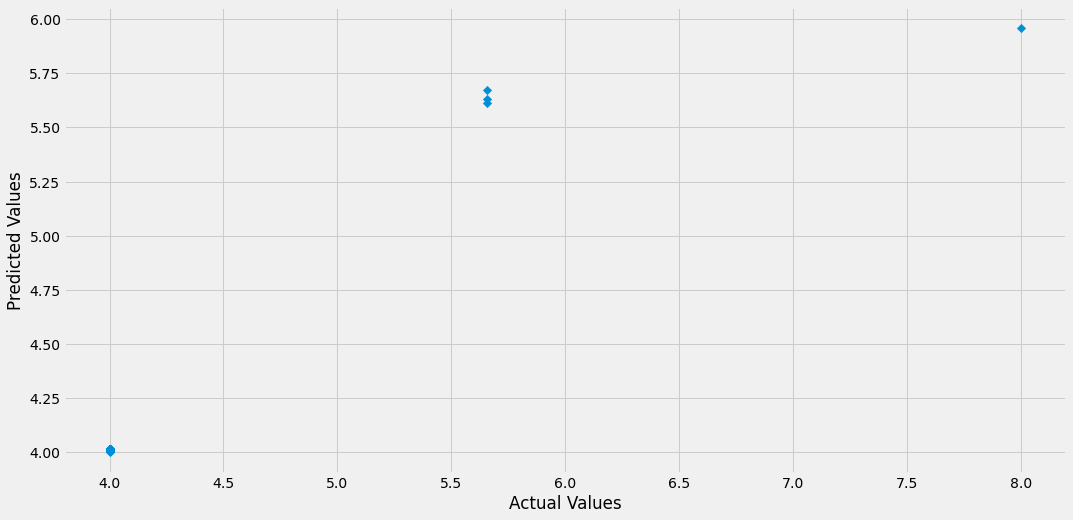

In [38]:
#spilit data 
from sklearn.model_selection import train_test_split

pred = model.predict(X)
pred_ann = model.predict(X_test)
pred_ann = scaler.inverse_transform(pred_ann)
y = scaler.inverse_transform(y_test)

import matplotlib.pyplot as plt 


plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.scatter(y,pred_ann, marker='D')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
#plt.savefig('C:/Users/CL/Pictures/PathLoss/ann_img6.png', dpi=500,bbox_inches='tight')
plt.show()
#plt.title('Path Loss')

In [39]:
y_test = scaler.inverse_transform(y_test)
y_pred = scaler.inverse_transform(y_pred)

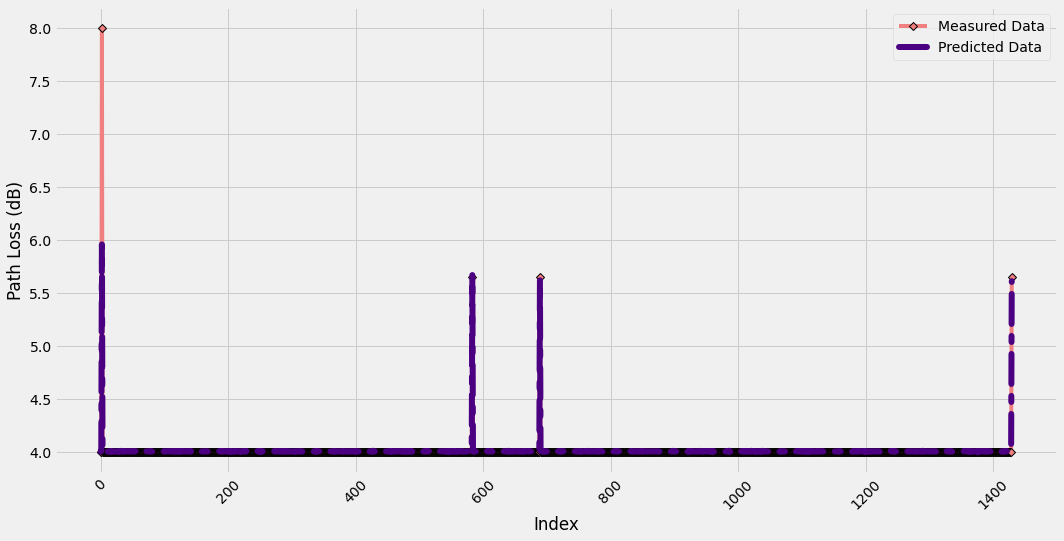

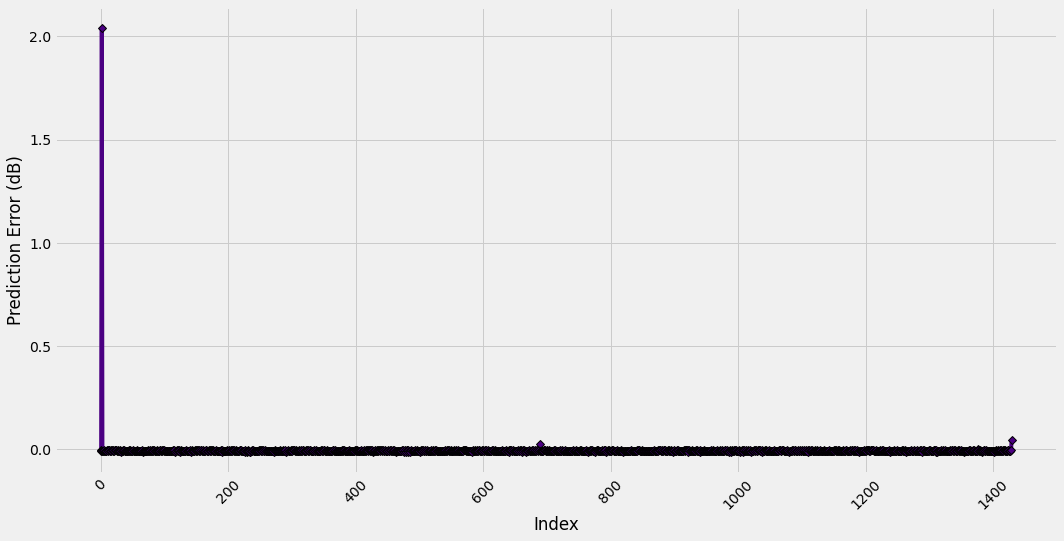

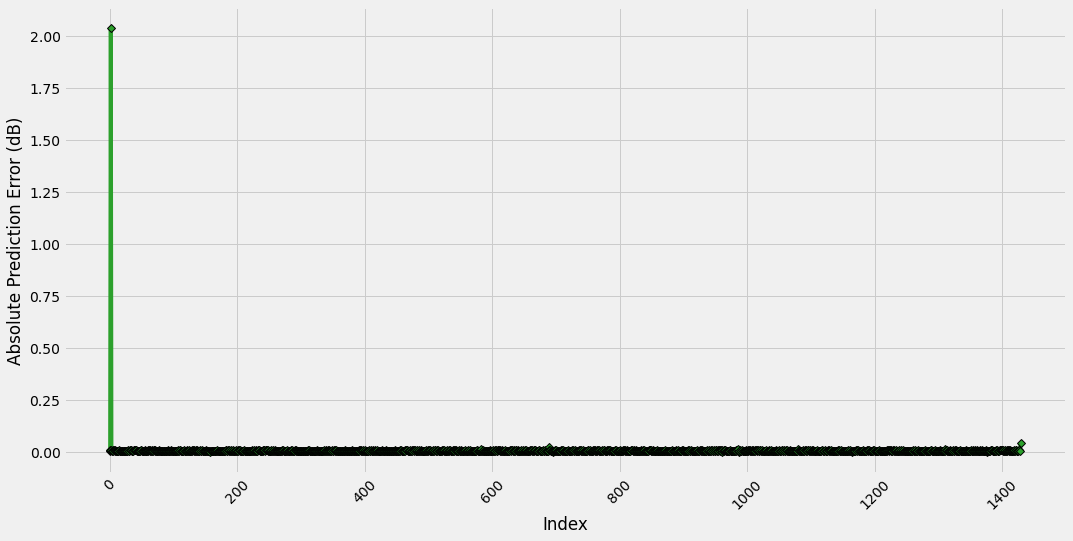

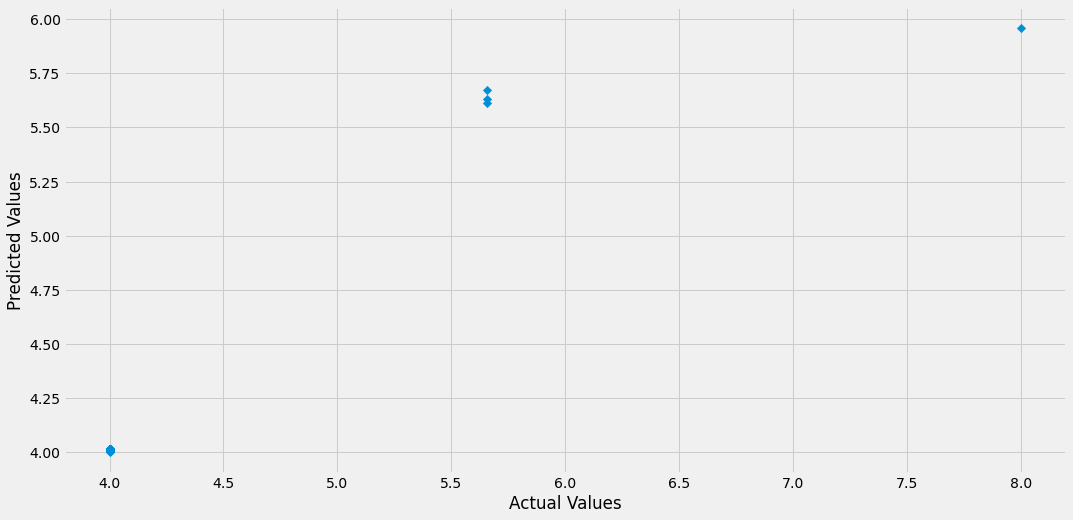

In [40]:
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.plot(y_test, label = 'Measured Data', color='lightcoral', marker='D', markeredgecolor='black')
plt.plot(y_pred, label = 'Predicted Data', color='#4b0082', linewidth=6,
         linestyle=(0, (5, 2, 1, 2)), dash_capstyle='round')
#plt.title('Path Loss Prediction (RMSE =  1.6270657623983986 )')
plt.xlabel('Index')
plt.ylabel('Path Loss (dB)')
plt.legend()
plt.xticks(rotation=45)
#plt.savefig('C:/Users/CL/Pictures/PathLoss/ann_img1.png', dpi=500, bbox_inches='tight')
plt.show()


import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.plot((y_test - y_pred), color='#4b0082', marker='D', markeredgecolor='black')
#plt.title('Path Loss Prediction (RMSE =  1.6270657623983986 )')
plt.xlabel('Index')
plt.ylabel('Prediction Error (dB)')
plt.xticks(rotation=45)
#plt.savefig('C:/Users/CL/Pictures/PathLoss/ann_img2.png', dpi=500, bbox_inches='tight')
plt.show()


import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.plot(abs(y_test - y_pred), color='#2ca02c', marker='D', markeredgecolor='black')
#plt.title('Path Loss Prediction (RMSE =  1.6270657623983986 )')
plt.xlabel('Index')
plt.ylabel('Absolute Prediction Error (dB)')
plt.xticks(rotation=45)
#plt.savefig('C:/Users/CL/Pictures/PathLoss/ann_img3.png', dpi=500, bbox_inches='tight')
plt.show()

plt.figure(figsize=(16,8))
plt.scatter(y_test,y_pred, marker='D')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
#plt.savefig('C:/Users/CL/Pictures/PathLoss/ann_img4.png', dpi=500,bbox_inches='tight')
plt.show()